In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
import pickle
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Softmax


DATA_DIR = r".\processed_data"
DATA = os.path.join(DATA_DIR, r'raw_data.pickle')
df = pd.read_pickle(DATA)

In [2]:
# IMGWIDTH,IMGHEIGHT = (52, 70)
# IMGWIDTH,IMGHEIGHT = (130, 174)
# IMGWIDTH,IMGHEIGHT = (260, 348)
IMGWIDTH,IMGHEIGHT = (520, 696)

RE_SIZE = 250

# do some croppping first
import cv2 
df.img_array = df.img_array.apply(lambda x: x.reshape(IMGWIDTH,IMGHEIGHT, 1))

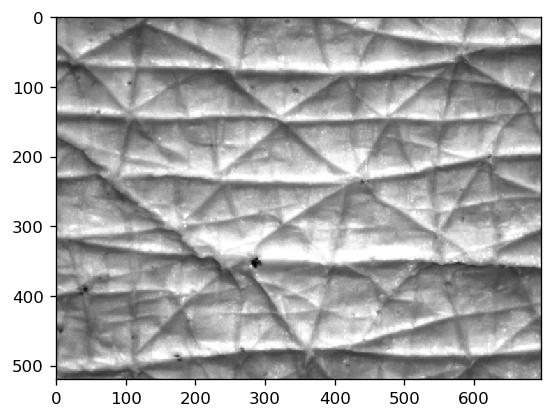

In [58]:
img_num = np.random.randint(np.random.randint(563))
fig, ax = plt.subplots(dpi=120)
plt.imshow(df.img_array[img_num].reshape(IMGWIDTH,IMGHEIGHT),cmap='gray')
plt.show()
# y_train[0]

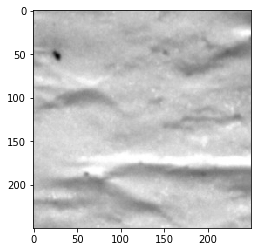

In [37]:
plt.imshow(croped.reshape(-1, 250, 250, 1)[0].reshape(RE_SIZE , RE_SIZE),cmap='gray')
plt.show()
# tf.image.random_crop(df.img_array[0], (250,250,1))

In [ ]:
croped = pd.Series(list(np.array([tf.image.random_crop(
    df.img_array, (len(df.img_array), RE_SIZE, RE_SIZE ,1)).numpy() for i in range(40)]).reshape(-1, 250, 250, 1)))

In [ ]:
grades = pd.Series(np.array([df.Grade.values for i in range(40)]).reshape(-1))

In [4]:
# X_train = np.stack(df.img_array.values).reshape(-1, 520, 696, 1)/255

X_train = np.stack(X_train.values).reshape(-1, IMGWIDTH,IMGHEIGHT, 1)/255

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False, dtype=np.int)
y_train = ohe.fit_transform(df.Grade.values.reshape(-1,1))  

N_CLASS = y_train.shape[-1]
input_shape=X_train.shape[1:]

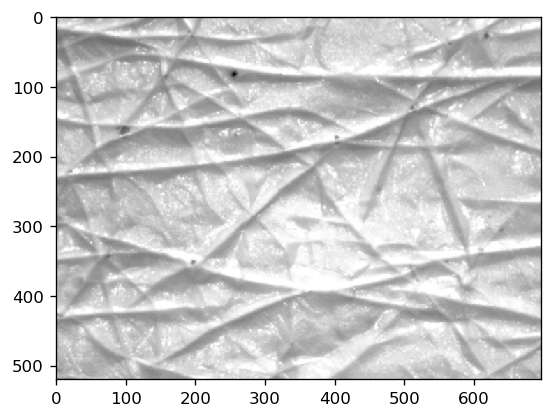

array([0, 0, 0, 0, 1])

In [14]:
# verify
img_num = np.random.randint(np.random.randint(563))
fig, ax = plt.subplots(dpi=120)
plt.imshow(X_train[img_num].reshape(IMGWIDTH,IMGHEIGHT),cmap='gray')
plt.show()
y_train[img_num]

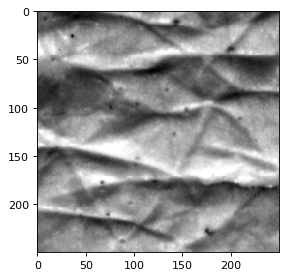

In [199]:
fig, ax = plt.subplots(dpi=80)
plt.imshow(tf.image.random_crop(X_train[0], (250,250,1)).numpy().reshape(250,250)*255,cmap='gray')
plt.show()

In [69]:
tf.keras.utils.normalize(X_train.reshape(-1,IMGWIDTH,IMGHEIGHT)*255, axis = 0)

array([[[0.03500705, 0.03448502, 0.03385424, ..., 0.04725715,
         0.04758471, 0.04829696],
        [0.03472041, 0.03444376, 0.03430359, ..., 0.04723841,
         0.04736014, 0.04784083],
        [0.03415334, 0.03453068, 0.03463795, ..., 0.04766578,
         0.0474432 , 0.04752302],
        ...,
        [0.03665456, 0.03704609, 0.03747368, ..., 0.0425069 ,
         0.04335785, 0.04398641],
        [0.03643247, 0.0371139 , 0.03761346, ..., 0.04326148,
         0.04393408, 0.04454922],
        [0.03654444, 0.03722833, 0.03779425, ..., 0.04364012,
         0.04392939, 0.04451347]],

       [[0.03850776, 0.03957677, 0.0402591 , ..., 0.03504717,
         0.03743631, 0.03994655],
        [0.03655991, 0.03719926, 0.03727656, ..., 0.03412919,
         0.03608392, 0.03858859],
        [0.03529178, 0.0354454 , 0.03532612, ..., 0.03298201,
         0.03456576, 0.03666061],
        ...,
        [0.04253739, 0.04337103, 0.04402029, ..., 0.04427802,
         0.04380028, 0.04376426],
        [0.0

In [64]:
tf.keras.utils.normalize(X_train, axis=0)

array([[[[0.03500705],
         [0.03448502],
         [0.03385424],
         ...,
         [0.04725715],
         [0.04758471],
         [0.04829696]],

        [[0.03472041],
         [0.03444376],
         [0.03430359],
         ...,
         [0.04723841],
         [0.04736014],
         [0.04784083]],

        [[0.03415334],
         [0.03453068],
         [0.03463795],
         ...,
         [0.04766578],
         [0.0474432 ],
         [0.04752302]],

        ...,

        [[0.03665456],
         [0.03704609],
         [0.03747368],
         ...,
         [0.0425069 ],
         [0.04335785],
         [0.04398641]],

        [[0.03643247],
         [0.0371139 ],
         [0.03761346],
         ...,
         [0.04326148],
         [0.04393408],
         [0.04454922]],

        [[0.03654444],
         [0.03722833],
         [0.03779425],
         ...,
         [0.04364012],
         [0.04392939],
         [0.04451347]]],


       [[[0.03850776],
         [0.03957677],
         [0.04

In [2]:
# try normalising
# we should not normalise accross all images, coz that may distort an image itself

# rather, we may normalise "within image"
# i.e. flatten -> normalise -> reshape

# X_train =  tf.keras.utils.normalize(X_train, axis=0)

# and try cropping (random)


# by the way, save cropped images or generate them on the fly?
# for efficiency, probably save them

In [ ]:
# Models

# the model input for cropped images would be 250*250; the model should be able to randomly sample (crop) from the iamge and then predict for each sub-sample, 
# the final output can be majority vote or something like that

In [127]:
# from tensorflow.keras.optimizers import SGD
init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=30027)

model = Sequential()
model.add(Conv2D(16, (5, 5), input_shape=X_train.shape[1:],  kernel_initializer=init, bias_initializer=init))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.125))


model.add(Conv2D(16, (5, 5), kernel_initializer=init, bias_initializer=init))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Dropout(0.25))


# model.add(Conv2D(128, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))



model.add(Flatten())


# since this should be a shallow net, we may get away with sigmoid activation
          
model.add(Dense(32, kernel_initializer=init, bias_initializer=init))
model.add(Activation('relu'))
          
model.add(Dense(N_CLASS, kernel_initializer=init, bias_initializer=init))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.RMSprop(learning_rate=1, decay=1e-6)
# opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=['accuracy'])

In [2]:
## definitely avoid building a large net; a small sample plus large net lead to overfitting for sure


# init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=30027)

# model = Sequential()
# model.add(Conv2D(64, (5, 5), padding='same',
#                  input_shape=X_train.shape[1:]
# #                  , kernel_initializer=init, bias_initializer=init
#                 ))
# model.add(Activation('relu'))




# model.add(Conv2D(64, (5, 5)
# #                  , kernel_initializer=init, bias_initializer=init
#                 ))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Dropout(0.25))




# model.add(Conv2D(128, (5, 5), padding='valid'
# #                  , kernel_initializer=init, bias_initializer=init
#                 ))
# model.add(Activation('elu'))




# model.add(Conv2D(128, (5, 5)
# #                  , kernel_initializer=init, bias_initializer=init
#                 ))
# model.add(Activation('elu'))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Dropout(0.25))




# model.add(Flatten())
# # model.add(Dense(512, kernel_initializer=init, bias_initializer=init))
# # model.add(Activation('relu'))
# # model.add(Dropout(0.5))


# model.add(Dense(256))
# model.add(Activation('sigmoid'))
# model.add(Dropout(0.25))


# model.add(Dense(256))
# model.add(Activation('elu'))
# model.add(Dropout(0.25))


# # model.add(Dense(64, kernel_initializer=init, bias_initializer=init))
# # model.add(Activation('elu'))
# # model.add(Dropout(0.125))


# model.add(Dense(N_CLASS))
# model.add(Activation('softmax'))

# # initiate RMSprop optimizer
# opt = tf.keras.optimizers.RMSprop(learning_rate=0.01, decay=1e-6)

# # Let's train the model using RMSprop
# model.compile(loss='kullback_leibler_divergence',
#               optimizer='adam',
#               metrics=['categorical_accuracy'])

In [135]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'),
    tf.keras.layers.Dropout(0.125),
    tf.keras.layers.Dense(5, activation='softmax')
])

# opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(optimizer='adam', loss='kullback_leibler_divergence', metrics=['mae', 'acc'])

In [19]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 258, 346, 8)       80        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 256, 344, 16)      1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 172, 16)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 172, 16)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 352256)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               45088896  
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [21]:
model.fit(X_train, y_train, batch_size=15, epochs=30, validation_split=0.1, shuffle=True)

Train on 481 samples, validate on 54 samples
Epoch 1/30
481/481 [==============================] - 2s 3ms/sample - loss: 1.6511 - accuracy: 0.2495 - val_loss: 1.6075 - val_accuracy: 0.2222
Epoch 2/30
481/481 [==============================] - 1s 2ms/sample - loss: 1.6271 - accuracy: 0.2640 - val_loss: 1.6079 - val_accuracy: 0.2222
Epoch 3/30
481/481 [==============================] - 1s 2ms/sample - loss: 1.6111 - accuracy: 0.2536 - val_loss: 1.6376 - val_accuracy: 0.2222
Epoch 4/30
481/481 [==============================] - 1s 2ms/sample - loss: 1.6153 - accuracy: 0.2703 - val_loss: 1.6308 - val_accuracy: 0.2222
Epoch 5/30
481/481 [==============================] - 1s 2ms/sample - loss: 1.6157 - accuracy: 0.2474 - val_loss: 1.6076 - val_accuracy: 0.2222
Epoch 6/30
481/481 [==============================] - 1s 2ms/sample - loss: 1.6219 - accuracy: 0.2557 - val_loss: 1.6138 - val_accuracy: 0.2222
Epoch 7/30
481/481 [==============================] - 1s 2ms/sample - loss: 1.6061 - accura

KeyboardInterrupt: 

In [24]:
# np.argmax(model.predict(X_train[:20]),axis=1)
model.predict(X_train[:20])

array([[0.1526162 , 0.19959709, 0.30331218, 0.15262963, 0.1918449 ],
       [0.15308864, 0.20052542, 0.30439207, 0.1523411 , 0.18965279],
       [0.15390942, 0.20158966, 0.3019938 , 0.15213825, 0.19036886],
       [0.15181352, 0.19974422, 0.30037642, 0.15421596, 0.19384983],
       [0.15327317, 0.19928758, 0.29752144, 0.1560969 , 0.19382091],
       [0.15468742, 0.20173027, 0.30014443, 0.15361157, 0.18982626],
       [0.15357669, 0.20015663, 0.29608363, 0.1559197 , 0.19426331],
       [0.14816006, 0.20106344, 0.30934465, 0.15113814, 0.19029371],
       [0.1520966 , 0.19968173, 0.305193  , 0.15409273, 0.18893594],
       [0.15311249, 0.2002757 , 0.3010992 , 0.15390964, 0.19160298],
       [0.15447655, 0.20011544, 0.29293782, 0.15951696, 0.19295324],
       [0.15513265, 0.20113565, 0.29903162, 0.15568732, 0.18901278],
       [0.15381762, 0.20114474, 0.2920632 , 0.15902086, 0.19395359],
       [0.15028964, 0.19996843, 0.302324  , 0.1540418 , 0.1933762 ],
       [0.15134487, 0.20001234, 0.

In [13]:
y_train[:10]

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])